M. Seaman "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


## Truthfully I don't know what most of these do.

In [20]:
df=pd.read_excel("train_test_dataset.xlsx")
df.head()
#Importing and displaying the begining of the data

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [21]:
df.info()
# Data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [77]:
df.isnull().sum()
# thousands of missing numbers in CHILD AND SPORT

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
GNDR         498
OWNHOME     1999
PCTMARR        0
HOMEVAL        0
dtype: int64

In [23]:
df = df.replace(r'\s+', np.nan, regex=True)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194


In [24]:
df.info()
# Finding data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
CHILD       582 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
SPORT       4273 non-null float64
COMP        1009 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.3+ MB


In [25]:
df = df.drop('SPORT', axis = 1)

In [26]:
df = df.drop('COMP', axis = 1)

In [27]:
df = df.drop('CHILD', axis = 1)

In [ ]:
#Dropped the above decided they weren't necessary

In [28]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
GNDR         498
OWNHOME     1999
PCTMARR        0
HOMEVAL        0
dtype: int64

In [29]:
df.groupby('GNDR').size()
# as it says just grouping by gender

GNDR
0.0    4819
1.0    3899
dtype: int64

In [30]:
df['AGE'].describe()
# Finding the average ages

count    7223.000000
mean       61.392912
std        16.594747
min        12.000000
25%        48.000000
50%        63.000000
75%        75.000000
max        97.000000
Name: AGE, dtype: float64

In [31]:
df.info()
# I find myself putting this when i don't know what else to put

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 16 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 1.1+ MB


In [78]:
df.describe().T
#Finding and showing basic description of data

,count,mean,std,min,25%,50%,75%,max
Y2defect,9216.0,0.500000,0.500027,0.0,0.0,0.5,1.0,1.0
Y1G5,9216.0,0.337023,0.472718,0.0,0.0,0.0,1.0,1.0
Y1G4,9216.0,0.510525,0.499916,0.0,0.0,1.0,1.0,1.0
Y1G3,9216.0,0.636719,0.480971,0.0,0.0,1.0,1.0,1.0
Y1G2,9216.0,0.291124,0.454305,0.0,0.0,0.0,1.0,1.0
Y1G1,9216.0,0.480252,0.499637,0.0,0.0,0.0,1.0,1.0
Y1price,9216.0,19.963108,8.820188,15.0,15.0,15.0,25.0,50.0
YEARS,9216.0,6.378038,2.873927,2.0,4.0,6.0,9.0,24.0
BACKER,9216.0,0.489475,0.499916,0.0,0.0,0.0,1.0,1.0
AGE,7223.0,61.392912,16.594747,12.0,48.0,63.0,75.0,97.0


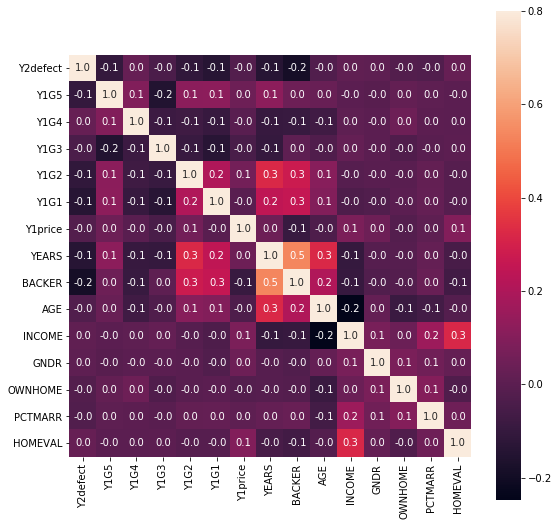

In [42]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f")
# What is correlation

INCOME
0.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
3.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
4.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
5.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
6.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

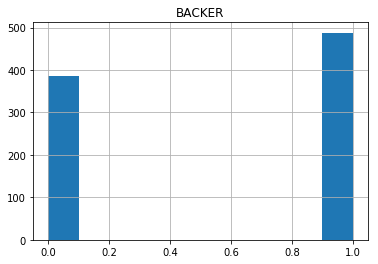

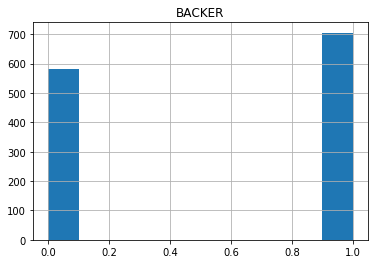

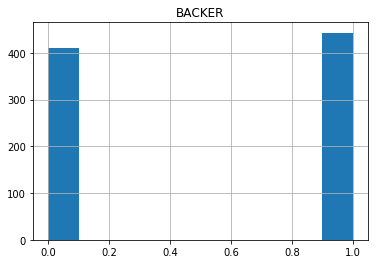

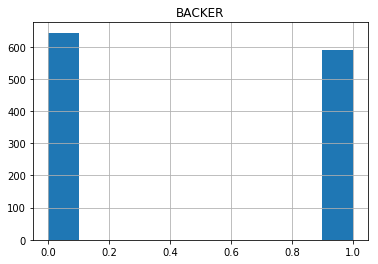

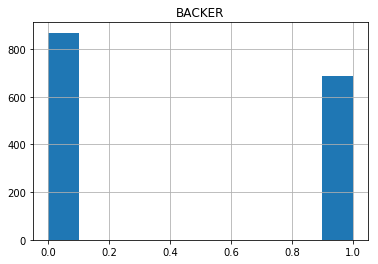

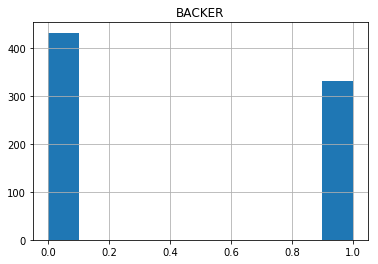

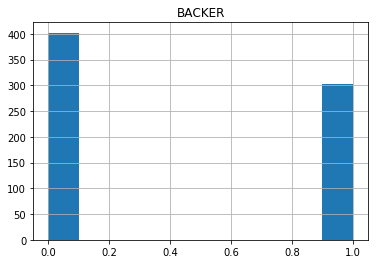

In [88]:

df.groupby('INCOME').hist('BACKER')
# 

In [79]:
df.groupby('INCOME').count()
# Groupby Income because who doesn't want to know more about income?

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,GNDR,OWNHOME,PCTMARR,HOMEVAL
INCOME,,,,,,,,,,,,,,,
0.0,875,875,875,875,875,875,875,875,875,875,717,847,379,875,875
1.0,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1081,1243,762,1287,1287
2.0,853,853,853,853,853,853,853,853,853,853,728,827,549,853,853
3.0,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1102,1202,988,1233,1233
4.0,1557,1557,1557,1557,1557,1557,1557,1557,1557,1557,1396,1514,1296,1557,1557
5.0,763,763,763,763,763,763,763,763,763,763,680,748,677,763,763
6.0,704,704,704,704,704,704,704,704,704,704,634,686,622,704,704


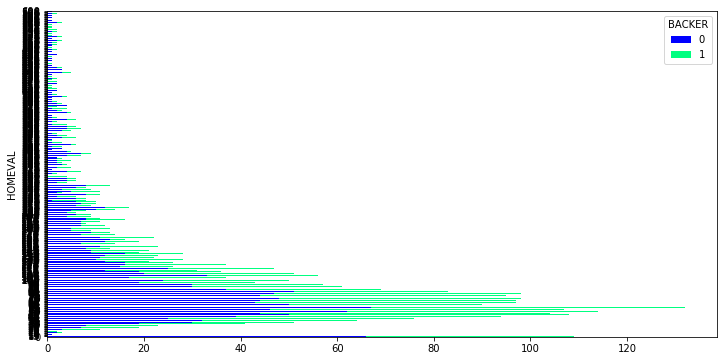

In [90]:
# graphs
df.groupby(['HOMEVAL', 'BACKER']).size().unstack().plot(kind='barh', stacked=True, figsize=[12,6], colormap='winter')

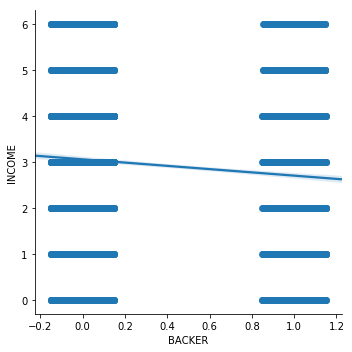

In [87]:
# More graphs 
sns.lmplot("BACKER", "INCOME", df, x_jitter=.15)

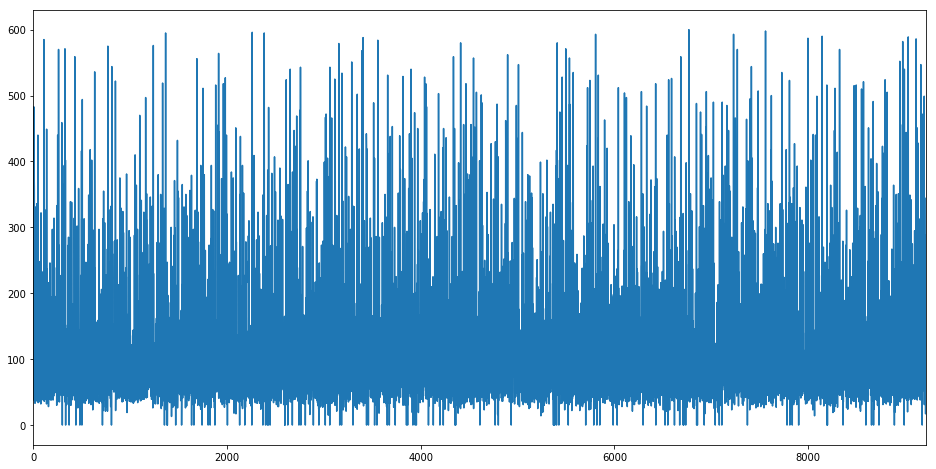

In [93]:
df['HOMEVAL'].plot(figsize=(16,8))
# I don't know I just started adding graphs 

# Model Development

Below is an example only. You should adapt this model.

In [34]:
y = df['Y2defect']
X = df[['BACKER', 'YEARS']]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.59349005425
[[1048  315]
 [ 809  593]]
             precision    recall  f1-score   support

          0       0.56      0.77      0.65      1363
          1       0.65      0.42      0.51      1402

avg / total       0.61      0.59      0.58      2765

0.595929669699


## Not a very solid number but i couldn't get anything better.

# I'm sorry!!

## Model Deployment & Prepare Entry Data

In [38]:
df2 = pd.read_excel("validation_dataset.xlsx")
df2.head()

# Import data
# show first couple rows

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


The column names of validation dataset must be same as those of the training-testing dataset.

In [50]:
# This is validation of Years versus Backer
validation = df2[['BACKER', 'YEARS']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 2 columns):
BACKER    9542 non-null int64
YEARS     9542 non-null int64
dtypes: int64(2)
memory usage: 149.2 KB


In [40]:
# I have no idea..
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 16 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 1.1+ MB


In [85]:
# applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("submissionentry.csv", index=False)

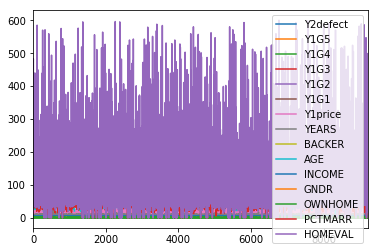

In [76]:
df.plot()
plt.show()

#found this plot online and thought i'd go ahead and add it in.

As we all know this project was made to help predict and anticipate the type of person who is going to buy athletic tickets. While we know this consist of tons and tons of factors, the ones I believe are most important are income and backers. Without having a decent income a person would be unable to purchase the tickets in the first place and Backers is just kind of a given. Anyone who backs a team or a school usually wants to watch them play the sport.

I know this whole thing is a mess, i apologize to those who have to look at it. 

Analytics & Data Mining aren't meant for me..

Maxwell